# Classification KNN 6133 Тюгаев Никита Павлович

In [1]:
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo 

from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)

#### 1. Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [2]:
automobile = fetch_ucirepo(id=10) 
  
X = automobile.data.features

y = automobile.data.targets

y_binary = y.copy()
y_binary.symboling = y.symboling.apply(lambda x: 1 if x > 0 else 0)

#### 2. Бинарная классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для всех последующих манипуляций.
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Нормализовать данные (`StandardScaler`или `MinMaxScaler`).
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить метрики на данных без нормализации и с применением нормализации.
     > Далее используем нормализованные данные.
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений (***см. [примечание](#примечание)***).
   - Осуществить бинарную классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
     > Естественно, искомые результаты - улучшение метрик.
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
     > данных - исходных данных до разбиения с применением нормализации с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.

##### Привести описание датасета.

##### Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".

In [3]:
features = X.replace('?', np.nan)

numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                  'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
                  'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
for column in numeric_columns:
    features[column] = pd.to_numeric(features[column], errors='coerce')

for column in numeric_columns:
    features.loc[:, column] = features[column].fillna(features[column].median())

features = features.drop(['normalized-losses'], axis=1)

categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                      'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
for column in categorical_columns:
    features.loc[:, column] = features[column].fillna(features[column].mode()[0])


##### Закодировать категориальные признаки при необходимости.

In [4]:
features = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

display(features.head())
print(features.shape)

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore  engine-size  curb-weight  height  width  length  wheel-base  \
0    2.68  3.47          130         2548    48.8   64.1   168.8        88.6   
1    2.68  3.47          130         2548    48.8   64.1   168.8        88.6   
2    3.47  2.68          152         2823    52.4   65.5   171.2        94.5   
3    3.40  3.19          109         2337    54.3   66.2   176.6        99.8   
4    3.40  3.19          136         2824    54.3   66.4   176.6        99.4   

   make_audi  make_bmw  make_chevrolet  make_dodge  make_honda  make_isuzu  \
0      False     False           False       False       False       False   
1      False     False           False       False       False       False   
2      False     False           False       False       False       False   
3       True     False           False       False       False       False   
4       True     False           False       False       False       False   

   make_jaguar  make_mazda  make_mercedes-benz  make_mercury  make_mitsubishi  \
0        False       False               False         False            False   
1        False       False               False         False            False   
2        False       False               False         False            False   
3        False       False               False         False            False   
4        False       False               False         False            False   

   make_nissan  make_peugot  make_plymouth  make_porsche  make_renault  \
0        False        False          False         False         False   
1        False        False          False         False         False   
2        False        False          False         False         False   
3        False        False          False         False         False   
4        False        False          False         False         False   

   make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  \
0      False        False        False            False       False   
1      False        False        False            False       False   
2      False        False        False            False       False   
3      False        False        False            False       False   
4      False        False        False            False       False   

   fuel-type_gas  aspiration_turbo  num-of-doors_4.0  body-style_hardtop  \
0           True             False             False               False   
1           True             False             False               False   
2           True             False             False               False   
3           True             False              True               False   
4           True             False              True               False   

   body-style_hatchback  body-style_sedan  body-style_wagon  drive-wheels_fwd  \
0                 False             False             False             False   
1                 False             False             False             False   
2                  True             False             False             False   
3                 False              True             False              True   
4                 False              True             False             False   

   drive-wheels_rwd  engine-location_rear  engine-type_dohcv  engine-type_l  \
0              True                 False              False          False   
1              True                 False              False          False   
2              True                 False     

(205, 64)


##### Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.

In [5]:
k = 3

model_knn = KNeighborsClassifier(n_neighbors=k)

##### Разбить выборку на обучающую и тестовую.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_binary_train, y_binary_test = train_test_split(
    features, y_binary, stratify=y_binary, train_size=0.75, random_state=42
)

##### Осуществить бинарную классификацию.

In [7]:
model_knn.fit(X_train, y_binary_train)
y_binary_pred = model_knn.predict(X_test)

c:\Users\Tyugaev-NPa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print(accuracy_score(y_binary_test, y_binary_pred))
print(precision_score(y_binary_test, y_binary_pred))
print(recall_score(y_binary_test, y_binary_pred))
print(f1_score(y_binary_test, y_binary_pred))
print(classification_report(y_binary_test, y_binary_pred))

0.6730769230769231
0.7307692307692307
0.6551724137931034
0.6909090909090909
              precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.73      0.66      0.69        29

    accuracy                           0.67        52
   macro avg       0.67      0.68      0.67        52
weighted avg       0.68      0.67      0.67        52



##### Нормализовать данные (`StandardScaler`или `MinMaxScaler`).

In [9]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

mm_scaled_x_train = pd.DataFrame(mm_scaler.fit_transform(X_train), columns=X_train.columns)
mm_scaled_x_test = pd.DataFrame(mm_scaler.transform(X_test), columns=X_test.columns)

##### Осуществить бинарную классификацию.

In [10]:
model_knn.fit(mm_scaled_x_train, y_binary_train)
y_binary_pred = model_knn.predict(mm_scaled_x_test)

c:\Users\Tyugaev-NPa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [11]:
print(accuracy_score(y_binary_test, y_binary_pred))
print(precision_score(y_binary_test, y_binary_pred))
print(recall_score(y_binary_test, y_binary_pred))
print(f1_score(y_binary_test, y_binary_pred))
print(classification_report(y_binary_test, y_binary_pred))

0.9230769230769231
0.9629629629629629
0.896551724137931
0.9285714285714286
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.96      0.90      0.93        29

    accuracy                           0.92        52
   macro avg       0.92      0.93      0.92        52
weighted avg       0.93      0.92      0.92        52



##### Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений

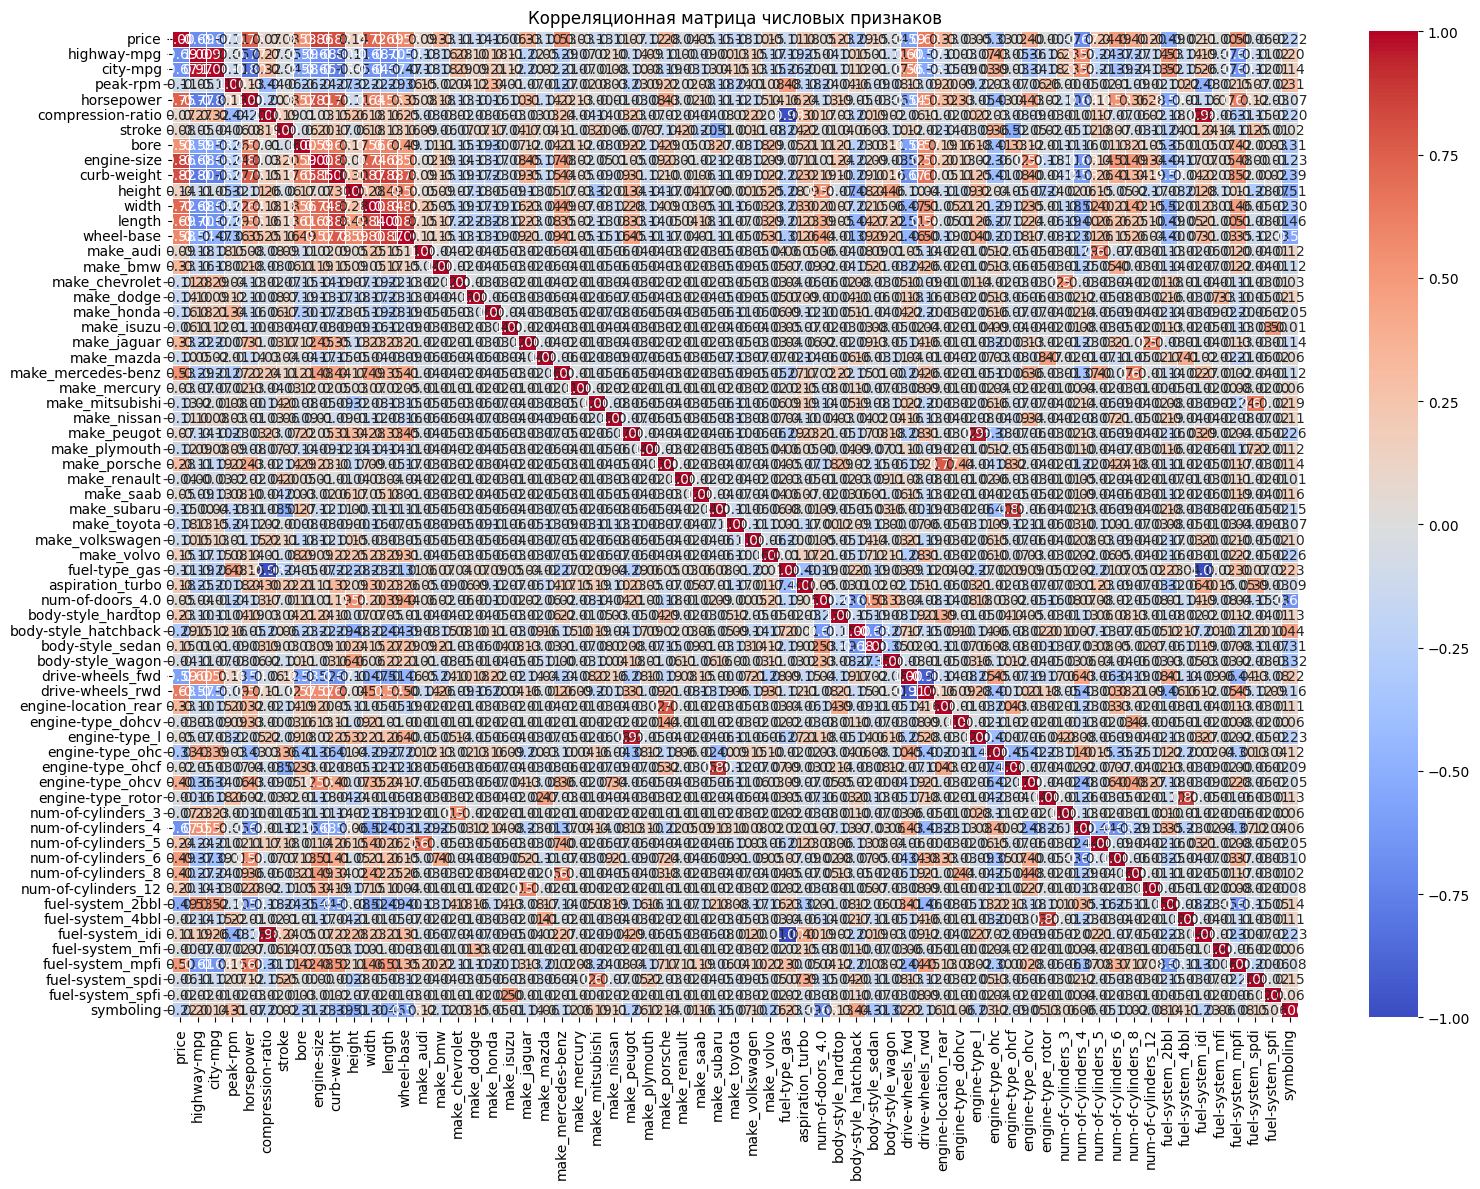

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = pd.concat([features, y_binary], axis=1).select_dtypes(include=['float64', 'int64', 'bool']).corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()


In [13]:
target_correlations = correlation_matrix['symboling'].drop('symboling')
print("Корреляция признаков с целевой переменной:")
print(target_correlations.sort_values(ascending=False))

# Выбираем признаки с абсолютной корреляцией выше определенного порога
correlation_threshold = 0.3
important_features_target = target_correlations[abs(target_correlations) > correlation_threshold].index.tolist()
print(f"\nВажные признаки (корреляция с целевой переменной > {correlation_threshold}):")
print(important_features_target)


Корреляция признаков с целевой переменной:
body-style_hatchback    0.442910
peak-rpm                0.312261
fuel-type_gas           0.232182
drive-wheels_fwd        0.216071
highway-mpg             0.198609
                          ...   
curb-weight            -0.385314
length                 -0.464014
height                 -0.507016
wheel-base             -0.548248
num-of-doors_4.0       -0.651838
Name: symboling, Length: 64, dtype: float64

Важные признаки (корреляция с целевой переменной > 0.3):
['peak-rpm', 'bore', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'num-of-doors_4.0', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon']


##### Осуществить бинарную классификацию с отфильтрованными признаками.

In [14]:
model_knn.fit(mm_scaled_x_train[important_features_target], y_binary_train)
y_binary_pred = model_knn.predict(mm_scaled_x_test[important_features_target])

c:\Users\Tyugaev-NPa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [15]:
print(accuracy_score(y_binary_test, y_binary_pred))
print(precision_score(y_binary_test, y_binary_pred))
print(recall_score(y_binary_test, y_binary_pred))
print(f1_score(y_binary_test, y_binary_pred))
print(classification_report(y_binary_test, y_binary_pred))

0.75
0.8076923076923077
0.7241379310344828
0.7636363636363637
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.81      0.72      0.76        29

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.76      0.75      0.75        52



##### Сравнить результаты "до" и "после" фильтрации, сделать выводы.

##### Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных

In [16]:
from sklearn.model_selection import cross_val_score
from tqdm.notebook import tqdm


knn_k_list = range(1, 11)
cv_k = 3
for knn_k in tqdm(knn_k_list):
    clf = KNeighborsClassifier(n_neighbors = knn_k)
    scores = cross_val_score(clf, features, y_binary.symboling, cv = cv_k)
    print(f"Neighbors: {knn_k}, folds count: {cv_k} avg score: {scores.mean()}")

  0%|          | 0/10 [00:00<?, ?it/s]

Neighbors: 1, folds count: 3 avg score: 0.5948422847399829
Neighbors: 2, folds count: 3 avg score: 0.5752344416027281
Neighbors: 3, folds count: 3 avg score: 0.5949843705598181
Neighbors: 4, folds count: 3 avg score: 0.5851804489911907
Neighbors: 5, folds count: 3 avg score: 0.546106848536516
Neighbors: 6, folds count: 3 avg score: 0.5462489343563512
Neighbors: 7, folds count: 3 avg score: 0.5316140949133276
Neighbors: 8, folds count: 3 avg score: 0.5462489343563512
Neighbors: 9, folds count: 3 avg score: 0.5169792554703041
Neighbors: 10, folds count: 3 avg score: 0.5317561807331629


#### 3. Многоклассовая классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Нормализовать данные.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
     > Разбиение использовать одно и то же для данных без фильтрации признаков и с применением фильтрации.
   - Осуществить многоклассовую классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений (***см. [примечание](#примечание)***).
   - Осуществить многоклассовую классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
      > данных - исходных данных до разбиения

     с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.
   - Для лучшего классификатора привести метрики, `classification_report`, построить [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) (это вроде матрицы $TN$ / $TP$ / $FN$ / $FP$, только расширенной для многоклассовой классификации, чтобы понять, в какие стороны чаще ошибается классификатор).

##### Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.

In [17]:
k = 3

model_knn = KNeighborsClassifier(n_neighbors=k)

##### Осуществить многоклассовую классификацию.

In [18]:
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

In [19]:
model_knn.fit(mm_scaled_x_train, y_train)
y_pred = model_knn.predict(mm_scaled_x_test)

c:\Users\Tyugaev-NPa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [20]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

0.6153846153846154
0.5546296296296296
0.5515250544662309
0.5202660150028572
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         2
          -1       0.50      1.00      0.67         4
           0       0.65      0.76      0.70        17
           1       0.40      0.40      0.40        10
           2       0.78      0.70      0.74        10
           3       1.00      0.44      0.62         9

    accuracy                           0.62        52
   macro avg       0.55      0.55      0.52        52
weighted avg       0.65      0.62      0.61        52



##### Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений (***см. [примечание](#примечание)***).

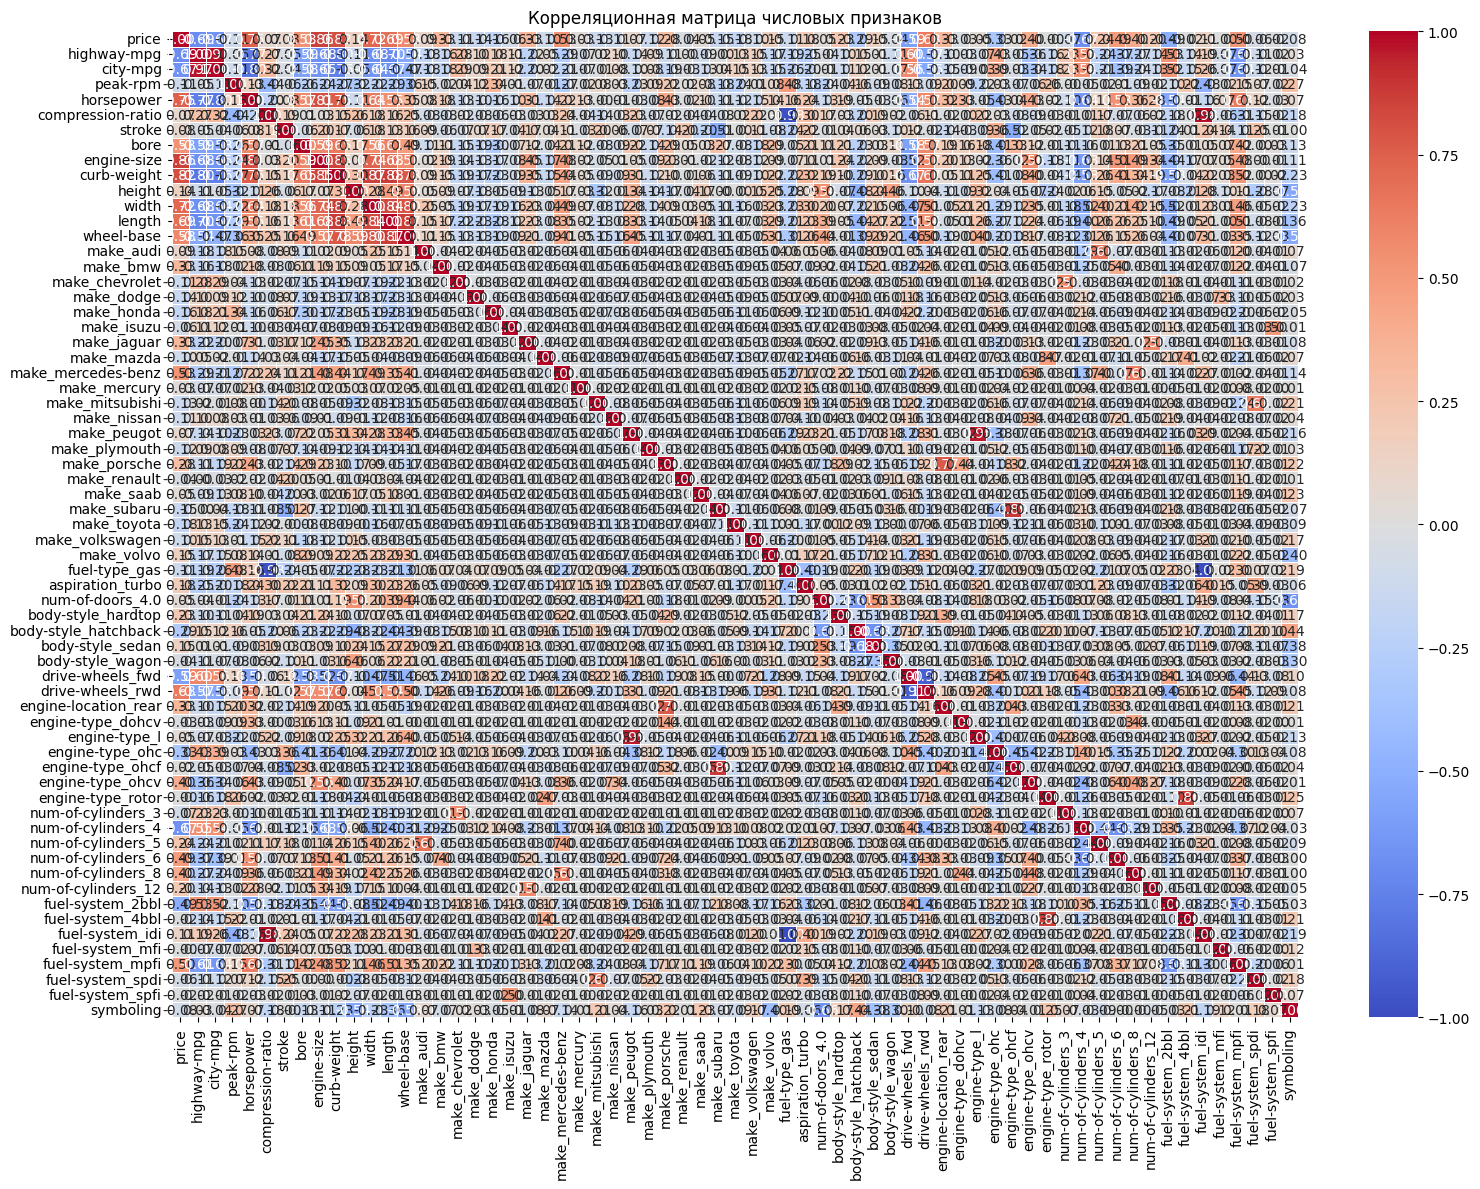

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = pd.concat([features, y], axis=1).select_dtypes(include=['float64', 'int64', 'bool']).corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()


In [22]:
target_correlations = correlation_matrix['symboling'].drop('symboling')
print("Корреляция признаков с целевой переменной:")
print(target_correlations.sort_values(ascending=False))

# Выбираем признаки с абсолютной корреляцией выше определенного порога
correlation_threshold = 0.3
important_features_target = target_correlations[abs(target_correlations) > correlation_threshold].index.tolist()
print(f"\nВажные признаки (корреляция с целевой переменной > {correlation_threshold}):")
print(important_features_target)


Корреляция признаков с целевой переменной:
body-style_hatchback    0.435648
peak-rpm                0.273851
engine-type_rotor       0.245950
make_saab               0.232847
make_porsche            0.224755
                          ...   
body-style_sedan       -0.378341
make_volvo             -0.403849
wheel-base             -0.531954
height                 -0.541038
num-of-doors_4.0       -0.663595
Name: symboling, Length: 64, dtype: float64

Важные признаки (корреляция с целевой переменной > 0.3):
['height', 'length', 'wheel-base', 'make_volvo', 'num-of-doors_4.0', 'body-style_hatchback', 'body-style_sedan']


##### Осуществить многоклассовую классификацию с отфильтрованными признаками.

In [23]:
model_knn.fit(mm_scaled_x_train[important_features_target], y_train)
y_pred = model_knn.predict(mm_scaled_x_test[important_features_target])

c:\Users\Tyugaev-NPa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [24]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

0.4807692307692308
0.4307928913192071
0.4072984749455338
0.40319865319865317
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         2
          -1       0.29      0.50      0.36         4
           0       0.53      0.59      0.56        17
           1       0.27      0.30      0.29        10
           2       0.50      0.50      0.50        10
           3       1.00      0.56      0.71         9

    accuracy                           0.48        52
   macro avg       0.43      0.41      0.40        52
weighted avg       0.52      0.48      0.48        52



c:\Users\Tyugaev-NPa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Tyugaev-NPa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Tyugaev-NPa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

##### Сравнить результаты "до" и "после" фильтрации, сделать выводы.

##### Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных

In [25]:
knn_k_list = range(1, 16)
cv_k = 3
for knn_k in tqdm(knn_k_list):
    clf = KNeighborsClassifier(n_neighbors = knn_k)
    scores = cross_val_score(clf, features, y.symboling, cv = cv_k)
    print(f"Neighbors: {knn_k}, folds count: {cv_k} avg score: {scores.mean()}")

  0%|          | 0/15 [00:00<?, ?it/s]

Neighbors: 1, folds count: 3 avg score: 0.3221795964762717
Neighbors: 2, folds count: 3 avg score: 0.2876527422563228
Neighbors: 3, folds count: 3 avg score: 0.28253765274225634
Neighbors: 4, folds count: 3 avg score: 0.29731457800511507
Neighbors: 5, folds count: 3 avg score: 0.2630718954248366
Neighbors: 6, folds count: 3 avg score: 0.2877237851662404
Neighbors: 7, folds count: 3 avg score: 0.2535521454958795
Neighbors: 8, folds count: 3 avg score: 0.273231031543052
Neighbors: 9, folds count: 3 avg score: 0.27806194941744816
Neighbors: 10, folds count: 3 avg score: 0.2830349531116794
Neighbors: 11, folds count: 3 avg score: 0.2682580278488207
Neighbors: 12, folds count: 3 avg score: 0.2828218243819267
Neighbors: 13, folds count: 3 avg score: 0.3024296675191816
Neighbors: 14, folds count: 3 avg score: 0.29262574595055413
Neighbors: 15, folds count: 3 avg score: 0.2974566638249503


##### Для лучшего классификатора привести метрики, `classification_report`, построить [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) (это вроде матрицы $TN$ / $TP$ / $FN$ / $FP$, только расширенной для многоклассовой классификации, чтобы понять, в какие стороны чаще ошибается классификатор).

In [26]:
model_knn = KNeighborsClassifier(n_neighbors=1)

model_knn.fit(mm_scaled_x_train, y_train)
y_pred = model_knn.predict(mm_scaled_x_test)

c:\Users\Tyugaev-NPa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [27]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

0.6538461538461539
0.6479500891265597
0.6352396514161219
0.6263772175536882
              precision    recall  f1-score   support

          -2       0.50      0.50      0.50         2
          -1       0.50      0.75      0.60         4
           0       0.71      0.71      0.71        17
           1       0.45      0.50      0.48        10
           2       0.73      0.80      0.76        10
           3       1.00      0.56      0.71         9

    accuracy                           0.65        52
   macro avg       0.65      0.64      0.63        52
weighted avg       0.69      0.65      0.66        52



<Figure size 1000x800 with 0 Axes>

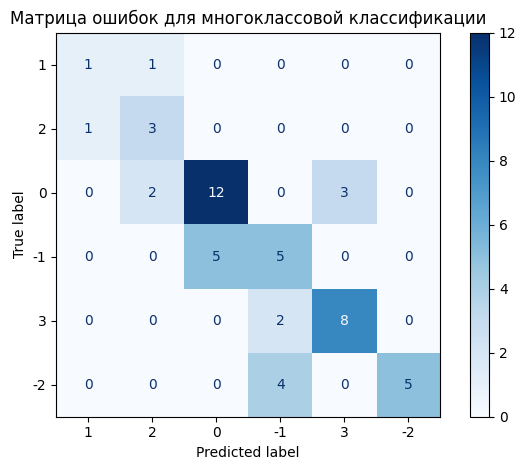

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
# Для многоклассовой классификации
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=y_test.symboling.unique())
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок для многоклассовой классификации')
plt.tight_layout()
plt.show()
